In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

In [ ]:
train_CSV = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_labels.csv"
df = pd.read_csv(train_CSV)

In [3]:
train_image = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_words"

# **Exploratory Data Analysis(EDA)**

In [4]:
print(df.head)

<bound method NDFrame.head of          IMAGE MEDICINE_NAME            GENERIC_NAME
0        0.png         Aceta             Paracetamol
1        1.png         Aceta             Paracetamol
2        2.png         Aceta             Paracetamol
3        3.png         Aceta             Paracetamol
4        4.png         Aceta             Paracetamol
...        ...           ...                     ...
3115  3115.png       Zithrin  Azithromycin Dihydrate
3116  3116.png       Zithrin  Azithromycin Dihydrate
3117  3117.png       Zithrin  Azithromycin Dihydrate
3118  3118.png       Zithrin  Azithromycin Dihydrate
3119  3119.png       Zithrin  Azithromycin Dihydrate

[3120 rows x 3 columns]>


In [5]:
print(df["MEDICINE_NAME"].unique())

['Aceta' 'Ace' 'Alatrol' 'Amodis' 'Atrizin' 'Axodin' 'Azithrocin' 'Azyth'
 'Az' 'Bacaid' 'Backtone' 'Baclofen' 'Baclon' 'Bacmax' 'Beklo' 'Bicozin'
 'Canazole' 'Candinil' 'Cetisoft' 'Conaz' 'Dancel' 'Denixil' 'Diflu'
 'Dinafex' 'Disopan' 'Esonix' 'Esoral' 'Etizin' 'Exium' 'Fenadin'
 'Fexofast' 'Fexo' 'Filmet' 'Fixal' 'Flamyd' 'Flexibac' 'Flexilax'
 'Flugal' 'Ketocon' 'Ketoral' 'Ketotab' 'Ketozol' 'Leptic' 'Lucan-R'
 'Lumona' 'M-Kast' 'Maxima' 'Maxpro' 'Metro' 'Metsina' 'Monas' 'Montair'
 'Montene' 'Montex' 'Napa Extend' 'Napa' 'Nexcap' 'Nexum' 'Nidazyl'
 'Nizoder' 'Odmon' 'Omastin' 'Opton' 'Progut' 'Provair' 'Renova' 'Rhinil'
 'Ritch' 'Rivotril' 'Romycin' 'Rozith' 'Sergel' 'Tamen' 'Telfast'
 'Tridosil' 'Trilock' 'Vifas' 'Zithrin']


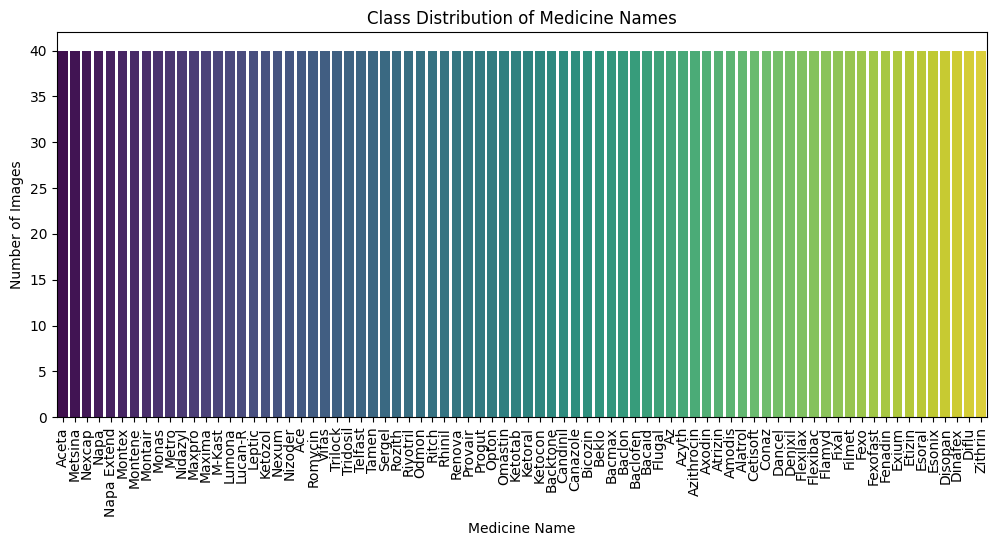

In [6]:
class_counts = df["MEDICINE_NAME"].value_counts()
plt.figure(figsize=(12, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Class Distribution of Medicine Names")
plt.xlabel("Medicine Name")
plt.ylabel("Number of Images")
plt.show()

In [7]:
img=cv2.imread("/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_words/0.png")

In [8]:
img.shape

(92, 238, 3)

In [9]:
img1=cv2.imread("/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_words/1.png")

In [10]:
img1.shape

(84, 207, 3)

In [11]:
def show_sample_images(df, train_image, num_samples=5):
    sample_data = df.sample(num_samples)  
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i, (idx, row) in enumerate(sample_data.iterrows()):
        img_path = os.path.join(train_image, row["IMAGE"])
        
        # Check if the image exists
        if not os.path.exists(img_path):
            print(f" Image not found: {img_path}")
            continue
        
        img = cv2.imread(img_path)

        if img is None:
            print(f" Failed to load: {img_path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        axes[i].imshow(img)
        axes[i].set_title(row["MEDICINE_NAME"])
        axes[i].axis("off")

    plt.show()




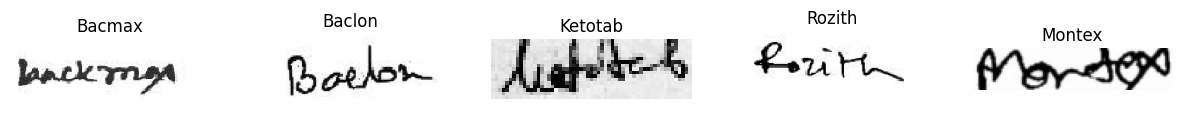

In [12]:
show_sample_images(df, train_image)


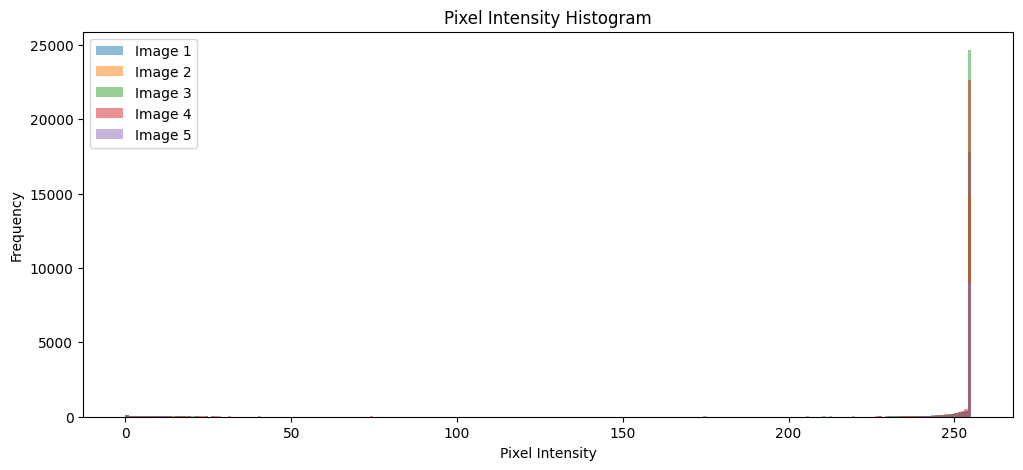

In [13]:
def plot_pixel_intensity(df, train_image, num_samples=5):
    plt.figure(figsize=(12, 5))

    for i in range(num_samples):
        img_path = os.path.join(train_image, df.iloc[i]["IMAGE"])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
        
        if img is not None:
            plt.hist(img.ravel(), bins=256, alpha=0.5, label=f"Image {i+1}")

    plt.legend()
    plt.title("Pixel Intensity Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

plot_pixel_intensity(df, train_image)

# **PRE-PROCESSING**

In [14]:
train_output_folder = "/kaggle/working/train_preprocessed_images"
os.makedirs(train_output_folder, exist_ok=True)

In [15]:
validation_output_folder = "/kaggle/working/valdiation_preprocessed_images"
os.makedirs(validation_output_folder, exist_ok=True)

In [16]:
test_output_folder = "/kaggle/working/test_preprocessed_images"
os.makedirs(test_output_folder, exist_ok=True)

In [17]:
def show_image(title, img):
    plt.figure(figsize=(4, 4))
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

In [18]:
def preprocess_and_save_images(input_folder,output_folder, target_size=(128, 128)):
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(input_folder, image_file)
        img = cv2.imread(image_path)
        
        if img is None:
            print(f"Error loading image: {image_file}")
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        resized = cv2.resize(gray, target_size)

        _, binary = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        save_path = os.path.join(output_folder, image_file)
        cv2.imwrite(save_path, binary)

        if i < 5:  
            show_image(f"Processed: {image_file}", binary)

    print(f"Processed {len(image_files)} images and saved to {output_folder}")

In [19]:
train_input_folder = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_words"

In [20]:
validation_input_folder = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words"

In [21]:
test_input_folder = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Testing/testing_words"

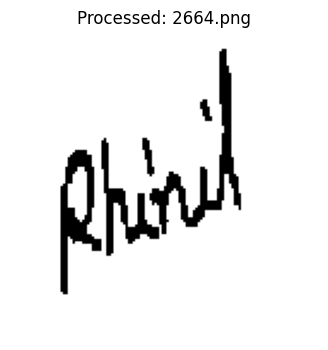

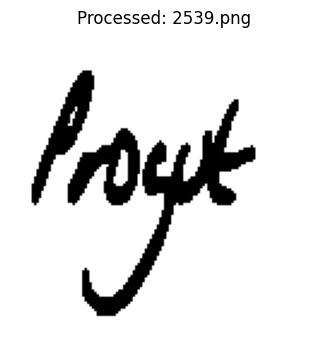

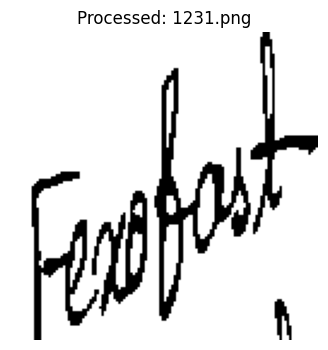

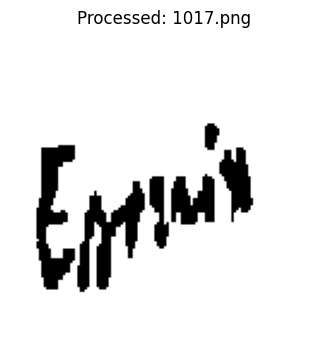

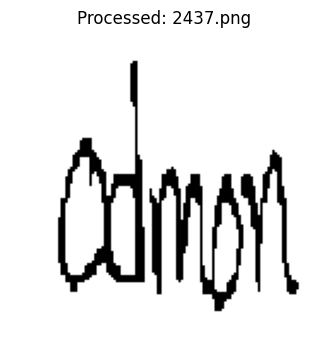

Processed 3120 images and saved to /kaggle/working/train_preprocessed_images


In [22]:
preprocess_and_save_images(train_input_folder,train_output_folder)

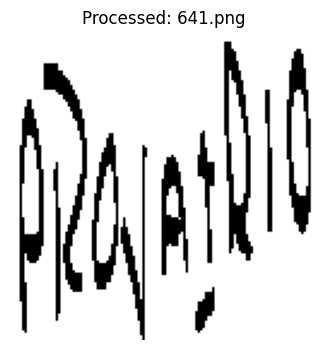

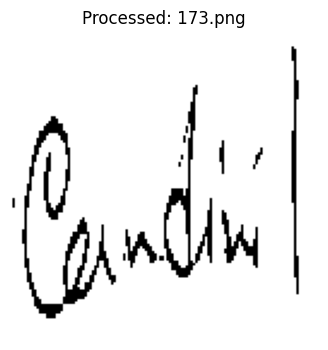

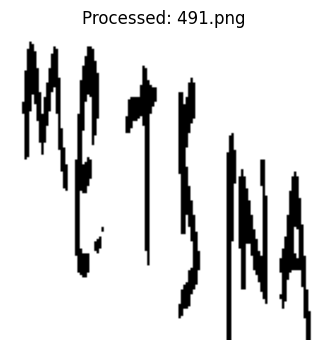

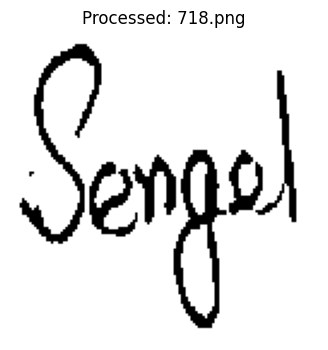

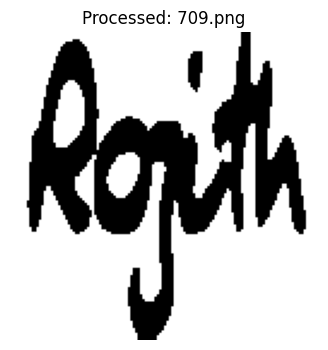

Processed 780 images and saved to /kaggle/working/valdiation_preprocessed_images


In [23]:
preprocess_and_save_images(validation_input_folder,validation_output_folder)

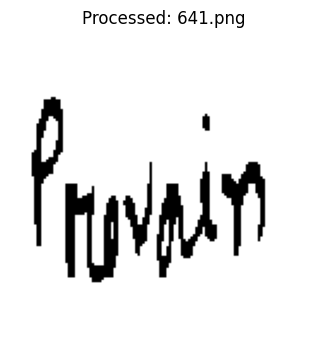

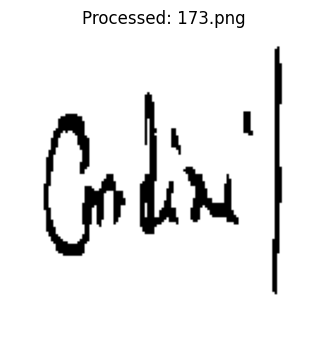

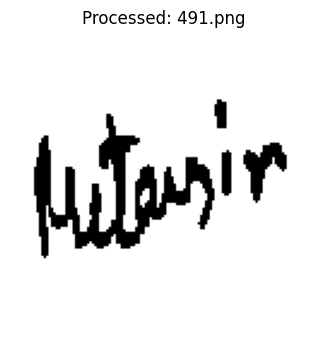

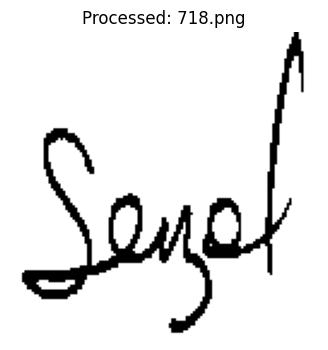

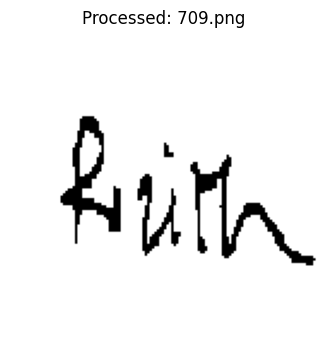

Processed 780 images and saved to /kaggle/working/test_preprocessed_images


In [24]:
preprocess_and_save_images(test_input_folder,test_output_folder)

# **Feature Extraction**

In [25]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
import joblib

In [26]:
hog_params = {
    "orientations": 9,
    "pixels_per_cell": (8, 8),
    "cells_per_block": (2, 2),
    "block_norm": "L2-Hys"
}

In [27]:
def extract_hog_features(image_path):
    """Extract HOG features from an image."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"Warning: Could not read {image_path}")
        return None

    # Apply HOG feature extraction
    features = hog(img, **hog_params)
    return features


In [28]:
def process_dataset(image_folder, csv_path):
    """Extract HOG features from images using labels from CSV file."""
    # Read CSV file
    df = pd.read_csv(csv_path)

    features_list = []
    labels_list = []

    for _, row in df.iterrows():
        image_name = row["IMAGE"]  # Assuming column name is "IMAGE"
        label = row["MEDICINE_NAME"]  # Assuming column name is "MEDICINE..."

        img_path = os.path.join(image_folder, image_name)

        # Extract HOG features
        features = extract_hog_features(img_path)
        if features is not None:
            features_list.append(features)
            labels_list.append(label)

    return np.array(features_list), labels_list

In [29]:
train_image_folder = "/kaggle/working/train_preprocessed_images"
tarin_csv_file = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_labels.csv"

In [30]:
X_train, y_train = process_dataset(train_image_folder, tarin_csv_file)

In [31]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [32]:
joblib.dump((X_train, y_train_encoded, label_encoder), "train_hog_features.pkl")

['train_hog_features.pkl']

In [33]:
print(f"Extracted Features Shape: {X_train.shape}")
print(f"Total Labels: {len(y_train_encoded)}")

Extracted Features Shape: (3120, 8100)
Total Labels: 3120


In [34]:
validation_image_folder = "/kaggle/working/valdiation_preprocessed_images"
validation_csv_file = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_labels.csv"

In [35]:
X_validation, y_validation = process_dataset(validation_image_folder, validation_csv_file)

In [36]:
label_encoder = LabelEncoder()
y_validation_encoded = label_encoder.fit_transform(y_validation)

In [37]:
joblib.dump((X_validation, y_validation_encoded, label_encoder), "validation_hog_features.pkl")

['validation_hog_features.pkl']

In [38]:
print(f"Extracted Features Shape: {X_validation.shape}")
print(f"Total Labels: {len(y_validation_encoded)}")

Extracted Features Shape: (780, 8100)
Total Labels: 780


In [39]:
test_image_folder = "/kaggle/working/test_preprocessed_images"
test_csv_file = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Testing/testing_labels.csv"

In [40]:
X_test, y_test = process_dataset(test_image_folder, test_csv_file)

In [41]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

In [42]:
joblib.dump((X_test, y_test_encoded, label_encoder), "test_hog_features.pkl")

['test_hog_features.pkl']

In [43]:
print(f"Extracted Features Shape: {X_test.shape}")
print(f"Total Labels: {len(y_test_encoded)}")

Extracted Features Shape: (780, 8100)
Total Labels: 780


# **MODEL TRAINING**

**Support Vector Machine (SVM)**

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [45]:
X_train, y_train, label_encoder = joblib.load("/kaggle/working/train_hog_features.pkl")

In [46]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [47]:
joblib.dump(svm_model, "svm_hog_model.pkl")

['svm_hog_model.pkl']

In [48]:
y_train_pred = svm_model.predict(X_train)

In [49]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 1.0000


In [50]:
print("Classification Report (Training Set):")
print(classification_report(y_train, y_train_pred))

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        40
           9       1.00      1.00      1.00        40
          10       1.00      1.00      1.00        40
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        40
          13       1.00      1.00      1.00        40
          14       1.00      1.00      1.00        40
          15       1.00      1.00      1.00        40
          16       1.00      1.00      1.00

**Validation**

In [51]:
X_val, y_val, _ = joblib.load("/kaggle/working/validation_hog_features.pkl")

In [52]:
svm_model = joblib.load("/kaggle/working/svm_hog_model.pkl")

In [53]:
y_val_pred = svm_model.predict(X_val)

In [54]:
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Accuracy: 0.6628


In [55]:
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.53      0.80      0.64        10
           2       0.64      0.70      0.67        10
           3       0.41      0.70      0.52        10
           4       0.42      0.50      0.45        10
           5       0.80      0.80      0.80        10
           6       0.50      0.70      0.58        10
           7       0.38      0.60      0.46        10
           8       0.50      0.60      0.55        10
           9       0.57      0.80      0.67        10
          10       0.50      0.70      0.58        10
          11       0.56      0.50      0.53        10
          12       1.00      0.30      0.46        10
          13       1.00      0.50      0.67        10
          14       0.50      0.80      0.62        10
          15       0.75      0.60      0.67        10
          16       0.78      0.70      0.

**Testing**

In [56]:
X_test, y_test, _ = joblib.load("/kaggle/working/test_hog_features.pkl")

In [57]:
y_test_pred = svm_model.predict(X_test)

In [58]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.5077


In [59]:
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.42      0.80      0.55        10
           2       0.22      0.20      0.21        10
           3       0.38      0.90      0.53        10
           4       0.29      0.20      0.24        10
           5       0.38      0.90      0.53        10
           6       0.78      0.70      0.74        10
           7       0.43      0.90      0.58        10
           8       0.82      0.90      0.86        10
           9       0.67      0.80      0.73        10
          10       0.50      0.60      0.55        10
          11       0.83      1.00      0.91        10
          12       1.00      0.50      0.67        10
          13       0.53      0.80      0.64        10
          14       0.50      0.30      0.37        10
          15       0.64      0.70      0.67        10
          16       0.20      0.10      0.13    

----------------------------------------------------------